In [ ]:
"""Kelompok Pola , CNN untuk Deteksi Masker """
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#melakukan extraksi dari dataset yg telah di download di G.Drive
import zipfile, os
local_zip = '/content/drive/MyDrive/P.Pola/Dataset_Mask.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Mendefinisikan dari lokasi Train data serta join untuk data masker dan non masker
base_dir='/tmp/Face Mask Dataset/Train'
mask_dir=os.path.join(base_dir,'WithMask')
non_mask_dir=os.path.join(base_dir,'WithoutMask')
# scissors_dir=os.path.join(base_dir,'scissors')

In [ ]:
#Melihat list directory dari Base Dir yang sebelumnya telah didefinisikan
os.listdir(base_dir)

['WithoutMask', 'WithMask']

In [ ]:
#Mendefinisikan untuk metode" yang ingin digunakan pada train data generator.
train_datagen=ImageDataGenerator(
    #Rotasi dengan range 20
    rotation_range=20, 
    brightness_range=None,
    #pergeseran gambar
    shear_range=0.2,
    #zoom gambar
    zoom_range=0.2,
    #fill mode ke Nearest
    fill_mode='nearest',
    #Melakukan flip pada horizontal
    horizontal_flip=True,
    #rescale dengan value 1./255
    rescale=1./255,
    #pasang validation split ke 0.2 => 20% data akan dipakai untuk validasi
    validation_split=0.2
     )
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
#Mendefinisikan metode" yang akan digunakan pada validation data generator
validation_datagen=ImageDataGenerator(
    #rotasi dengan value 20
    rotation_range=20, 
    brightness_range=None,
    #pergeseran gambar
    shear_range=0.2,
    #zooming gambar
    zoom_range=0.2,
    #fill mode ke nearest
    fill_mode='nearest',
    #horizontal flip ke true
    horizontal_flip=True,
    #rescale gambar dengan value 1./255
    rescale=1./255,
    #pasang validation split ke 0.2 => 20% data akan dipakai untuk validasi
    validation_split=0.2
)

In [ ]:
#Mendefinisikan train generantor dengan metode dari train_datagen yang sebelumnya telah didefinisikan
train_generator=train_datagen.flow_from_directory(
    #alamat awal
    base_dir,
    #target size gambar pasang ke ukuran 150 x 150
    target_size=(150,150),
    #batch ke ukuran 4
    batch_size=4,
    class_mode='sparse',
    #masukan pada subset training
    subset='training'
)
validation_generator=validation_datagen.flow_from_directory(
    #alamat awal
    base_dir,
    #target untuk ukuran gambar 150 x 150
    target_size=(150,150),
    #batch ukurang dengan 4
    batch_size=4,
    class_mode='sparse',
    #masukan kedalam subset validation
    subset='validation'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
#mendefinisikan model dari pada latih data. Dalam hal ini hiden layer nya
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                       
])

In [ ]:
#compile modelnya. Dengan konfigurasi memakai sparse categorical crossentropy dan optimizer adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#melakukan latih data dengan model yang telah ditentukan sebelumnya
model.fit(
      train_generator,
      steps_per_epoch=30,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=1,
      )

Epoch 1/25
30/30 [==============================] - 5s 149ms/step - loss: 0.6796 - accuracy: 0.6500 - val_loss: 0.4028 - val_accuracy: 0.8000
Epoch 2/25
30/30 [==============================] - 4s 140ms/step - loss: 0.3181 - accuracy: 0.9000 - val_loss: 0.6515 - val_accuracy: 0.7000
Epoch 3/25
30/30 [==============================] - 4s 140ms/step - loss: 0.4596 - accuracy: 0.8333 - val_loss: 0.3672 - val_accuracy: 0.8500
Epoch 4/25
30/30 [==============================] - 4s 140ms/step - loss: 0.2567 - accuracy: 0.9250 - val_loss: 0.4008 - val_accuracy: 0.9000
Epoch 5/25
30/30 [==============================] - 4s 140ms/step - loss: 0.3281 - accuracy: 0.8833 - val_loss: 0.1610 - val_accuracy: 0.9500
Epoch 6/25
30/30 [==============================] - 4s 141ms/step - loss: 0.3719 - accuracy: 0.8833 - val_loss: 0.2981 - val_accuracy: 0.9500
Epoch 7/25
30/30 [==============================] - 4s 140ms/step - loss: 0.2495 - accuracy: 0.9000 - val_loss: 0.1063 - val_accuracy: 1.0000
Epoch 

Saving 130.png to 130 (8).png
[[1. 0. 0.]]
Hasil class Masker =  1.0
Hasil class Tanpa Masker =  0.0
Dengan Masker


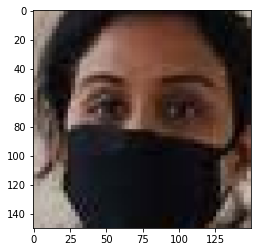

In [ ]:
#mencoba untuk melakukan prediksi dengan melakukan inputan gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes)
  print("Hasil class Masker = " , classes[0][0])
  print("Hasil class Tanpa Masker = " ,classes[0][1])
  
  if classes[0][0]==1:
    print('Dengan Masker')
  elif classes[0][1]==1:
    print('Tanpa Masker')

  else:
    print('Gambar Salah')